In [31]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

Загрузите датасет в pandas DataFrame под названием df.

In [2]:
df = pd.read_csv('train.csv')

Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [44]:
drop_col = ['MSZoning', 
            'LotFrontage', 
            'LotShape', 
            'LotConfig', 
            'LandSlope', 
            'HouseStyle', 
            'RoofStyle', 
            'RoofMatl', 
            'Exterior2nd', 
            'MasVnrArea', 
            'BsmtQual', 
            'BsmtExposure', 
            'BsmtFinSF1', 
            'BsmtFinType2', 
            'BsmtFinSF2', 
            'BsmtUnfSF', 
            'HeatingQC', 
            'LowQualFinSF', 
            'BsmtFullBath', 
            'BsmtHalfBath', 
            'HalfBath', 
            'TotRmsAbvGrd', 
            'FireplaceQu', 
            'GarageType', 
            'GarageFinish', 
            'GarageQual', 
            'PavedDrive', 
            'WoodDeckSF', 
            'OpenPorchSF', 
            'EnclosedPorch', 
            'PoolQC', 
            'MiscFeature',
            'Condition1',
            'Condition2']
df.drop(columns=drop_col, axis=1, inplace=True)

KeyError: "['MSZoning', 'LotFrontage', 'LotShape', 'LotConfig', 'LandSlope', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolQC', 'MiscFeature'] not found in axis"

In [6]:
df.isna().sum()

Id                  0
MSSubClass          0
LotArea             0
Street              0
Alley            1369
LandContour         0
Utilities           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
Exterior1st         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtCond           37
BsmtFinType1       37
TotalBsmtSF         0
Heating             0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
FullBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
Functional          0
Fireplaces          0
GarageYrBlt        81
GarageCars          0
GarageArea          0
GarageCond         81
3SsnPorch           0
ScreenPorch         0
PoolArea            0
Fence            1179
MiscVal             0
MoSold              0
YrSold    

In [7]:
# Удалим метки со значительными отсутствующими значениями

df.drop(columns=['Alley', 'Fence', 'MasVnrType'], axis=1, inplace=True)
df

,Id,MSSubClass,LotArea,Street,LandContour,Utilities,Neighborhood,Condition1,Condition2,BldgType,...,GarageCond,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,8450,Pave,Lvl,AllPub,CollgCr,Norm,Norm,1Fam,...,TA,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,9600,Pave,Lvl,AllPub,Veenker,Feedr,Norm,1Fam,...,TA,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,11250,Pave,Lvl,AllPub,CollgCr,Norm,Norm,1Fam,...,TA,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,9550,Pave,Lvl,AllPub,Crawfor,Norm,Norm,1Fam,...,TA,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,14260,Pave,Lvl,AllPub,NoRidge,Norm,Norm,1Fam,...,TA,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,Pave,Lvl,AllPub,Gilbert,Norm,Norm,1Fam,...,TA,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,13175,Pave,Lvl,AllPub,NWAmes,Norm,Norm,1Fam,...,TA,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,9042,Pave,Lvl,AllPub,Crawfor,Norm,Norm,1Fam,...,TA,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,9717,Pave,Lvl,AllPub,NAmes,Norm,Norm,1Fam,...,TA,0,0,0,0,4,2010,WD,Normal,142125


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   Condition2     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  Exterior1st    1460 non-null   object 
 15  ExterQual      1460 non-null   object 
 16  ExterCond      1460 non-null   object 
 17  Foundation     1460 non-null   object 
 18  BsmtCond

In [9]:
# Остальные данные будем заполнять исходя из заполненной информации

df['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [10]:
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)

In [11]:
df['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [12]:
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)

In [13]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [14]:
df['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [15]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [16]:
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)

In [17]:
df.drop('Id', axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   Street         1460 non-null   object 
 3   LandContour    1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   Condition1     1460 non-null   object 
 7   Condition2     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  Exterior1st    1460 non-null   object 
 14  ExterQual      1460 non-null   object 
 15  ExterCond      1460 non-null   object 
 16  Foundation     1460 non-null   object 
 17  BsmtCond       1460 non-null   object 
 18  BsmtFinT

In [19]:
df.head()

,MSSubClass,LotArea,Street,LandContour,Utilities,Neighborhood,Condition1,Condition2,BldgType,OverallQual,...,GarageCond,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,8450,Pave,Lvl,AllPub,CollgCr,Norm,Norm,1Fam,7,...,TA,0,0,0,0,2,2008,WD,Normal,208500
1,20,9600,Pave,Lvl,AllPub,Veenker,Feedr,Norm,1Fam,6,...,TA,0,0,0,0,5,2007,WD,Normal,181500
2,60,11250,Pave,Lvl,AllPub,CollgCr,Norm,Norm,1Fam,7,...,TA,0,0,0,0,9,2008,WD,Normal,223500
3,70,9550,Pave,Lvl,AllPub,Crawfor,Norm,Norm,1Fam,7,...,TA,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,14260,Pave,Lvl,AllPub,NoRidge,Norm,Norm,1Fam,8,...,TA,0,0,0,0,12,2008,WD,Normal,250000


Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

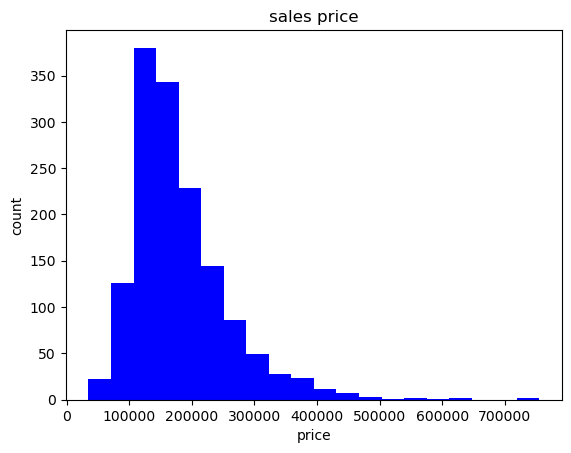

In [20]:
plt.hist(df['SalePrice'], bins=20, color='blue')
plt.xlabel('price')
plt.ylabel('count')
plt.title('sales price')
plt.show()

In [21]:
df[df['SalePrice'] > 700000]

,MSSubClass,LotArea,Street,LandContour,Utilities,Neighborhood,Condition1,Condition2,BldgType,OverallQual,...,GarageCond,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,21535,Pave,Lvl,AllPub,NoRidge,Norm,Norm,1Fam,10,...,TA,0,0,0,0,1,2007,WD,Normal,755000
1182,60,15623,Pave,Lvl,AllPub,NoRidge,Norm,Norm,1Fam,10,...,TA,0,0,555,0,7,2007,WD,Abnorml,745000


Согласно графику, можно сделать выводы что в целевом признаке имеются аномалии а не выбросы, т.к. стоимость дома определяет сам собственник а не законодательство. 

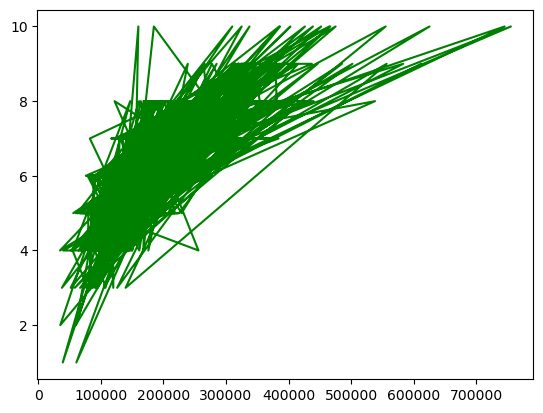

In [23]:
plt.plot(df['SalePrice'], df['OverallQual'], color='green')
plt.show()

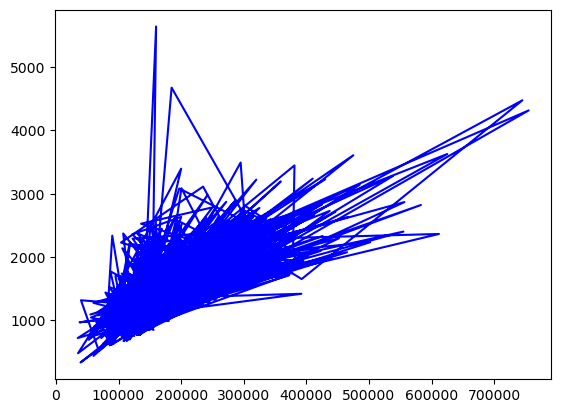

In [24]:
plt.plot(df['SalePrice'], df['GrLivArea'], color='blue')
plt.show()

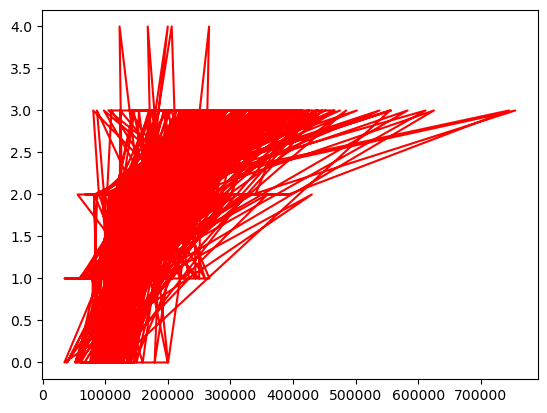

In [25]:
plt.plot(df['SalePrice'], df['GarageCars'], color='red')
plt.show()

Согласно графикам можно сделать вывод о корреляции между целевой метрикой и метками GarageCars, GrLivArea, OverallQual

Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [39]:
df.head()

,MSSubClass,LotArea,Street,LandContour,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Utilities_NoSeWa
0,60,8450,1,3,CollgCr,Norm,Norm,1Fam,7,5,...,0,0,0,0,2,2008,WD,Normal,208500,False
1,20,9600,1,3,Veenker,Feedr,Norm,1Fam,6,8,...,0,0,0,0,5,2007,WD,Normal,181500,False
2,60,11250,1,3,CollgCr,Norm,Norm,1Fam,7,5,...,0,0,0,0,9,2008,WD,Normal,223500,False
3,70,9550,1,3,Crawfor,Norm,Norm,1Fam,7,5,...,0,0,0,0,2,2006,WD,Abnorml,140000,False
4,60,14260,1,3,NoRidge,Norm,Norm,1Fam,8,5,...,0,0,0,0,12,2008,WD,Normal,250000,False


In [29]:
df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [32]:
le = LabelEncoder()
df['Street'] = le.fit_transform(df['Street'])

In [35]:
df['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [36]:
df['LandContour'] = le.fit_transform(df['LandContour'])

In [37]:
df['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [38]:
df = pd.get_dummies(df, columns=['Utilities'], drop_first=True)

In [41]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [42]:
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])

In [46]:
df.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

In [48]:
df['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [49]:
df = pd.get_dummies(df, columns=['BldgType'], prefix='Bldg Type', drop_first=True)

In [51]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [52]:
df['Exterior1st'] = le.fit_transform(df['Exterior1st'])

In [54]:
df['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [55]:
df['ExterQual'] = le.fit_transform(df['ExterQual'])

In [57]:
df['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [58]:
df['ExterCond'] = le.fit_transform(df['ExterCond'])

Оставшиеся строковые признаки можно будет подобным образом преоразовать либо OHE либо LabelEncoding. 

Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [60]:
df.to_csv('cleaned_house_prices.csv', index=False)